What this notebook does:
* output different galaxy samples with various size and sampling strategy
* file-naming convention: `F5_photoz_pt75_to_8_<NUM_OF_GAL>.h5`


In [77]:
from __future__ import (division, print_function)

In [155]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [174]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
import sys
sys.path.append("../../MagicBeans/machinery/")
import prepare_catalog_for_threshing as prep

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import h5py

# import custom function

In [94]:
import select_gal_sample as select
from scipy.spatial import distance

In [81]:
plt.rcParams['figure.figsize'] = (8, 6)

In [82]:
df = pd.read_hdf("F5_gold_sample.h5", "df")

In [83]:
# fix column names to be less annoying
df.columns = [col.split('.')[1] for col in df.columns]

In [84]:
f = h5py.File("gold_sample_h5py.h5")

In [85]:
df.shape

(234679, 12)

# pick a redshift range

In [86]:
photoz_cuts = (.75, 0.8)
photoz_mask = np.logical_and(df['z_b'] < photoz_cuts[1], 
                             df['z_b'] > photoz_cuts[0])

In [87]:
import seaborn as sns
sns.set_style('white')

In [88]:
import statsmodels as sm
kde = sm.nonparametric.kde.KDEUnivariate(df.z_b)
kde.fit()

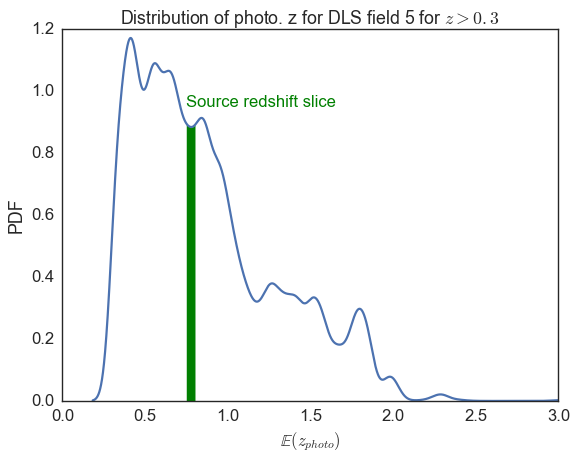

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density, lw=2)
mask = np.logical_and(kde.support > 0.75, kde.support < 0.8)
ax.fill_between(kde.support[mask], 0, kde.density[mask], color='g',
                )
ax.text(0.75, 0.95, 'Source redshift slice', color='g', size=15)
ax.set_xlabel(r'$\mathbb{E}(z_{photo})$', size=15)
ax.set_ylabel('PDF', size=16)
ax.set_xlim(0, 3)
ax.set_title('Distribution of photo. z for DLS field 5 for $z > 0.3$', 
             size=16)
plt.savefig('DLS_photoz.pdf', bbox_inches='tight')

In [90]:
df[photoz_mask].shape[0]

8407

## Visualize the features 

In [27]:
from pandas.tools.plotting import scatter_matrix

In [19]:
df[photoz_mask].describe()

,alpha,delta,r,e1,e2,de,a,b,processflags,z_b,flux_radius,Dlsqc_prob
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407,8407.000000,8407.000000,8407.000000
mean,209.820105,-11.051370,23.507519,0.004560,-0.004317,0.101582,1.989615,1.036978,0,0.775802,2.909432,0.000383
std,0.591095,0.572832,0.891399,0.253246,0.232786,0.064331,1.045302,0.505752,0,0.010968,0.706315,0.004568
min,208.800121,-12.063484,21.005300,-0.793309,-0.823150,0.006386,0.442485,0.400019,0,0.760000,1.543050,0.000000
25%,209.294554,-11.539614,22.903200,-0.149388,-0.151360,0.047174,1.295925,0.674244,0,0.770000,2.419460,0.000000
50%,209.797999,-11.054613,23.565300,0.006204,-0.003006,0.089556,1.773410,0.930168,0,0.780000,2.765680,0.000000
75%,210.339749,-10.564829,24.169300,0.163374,0.143024,0.147661,2.421105,1.273035,0,0.780000,3.218120,0.000000
max,210.869082,-10.037153,26.353100,0.779452,0.840593,0.249962,14.888200,7.056450,0,0.790000,13.600100,0.098008


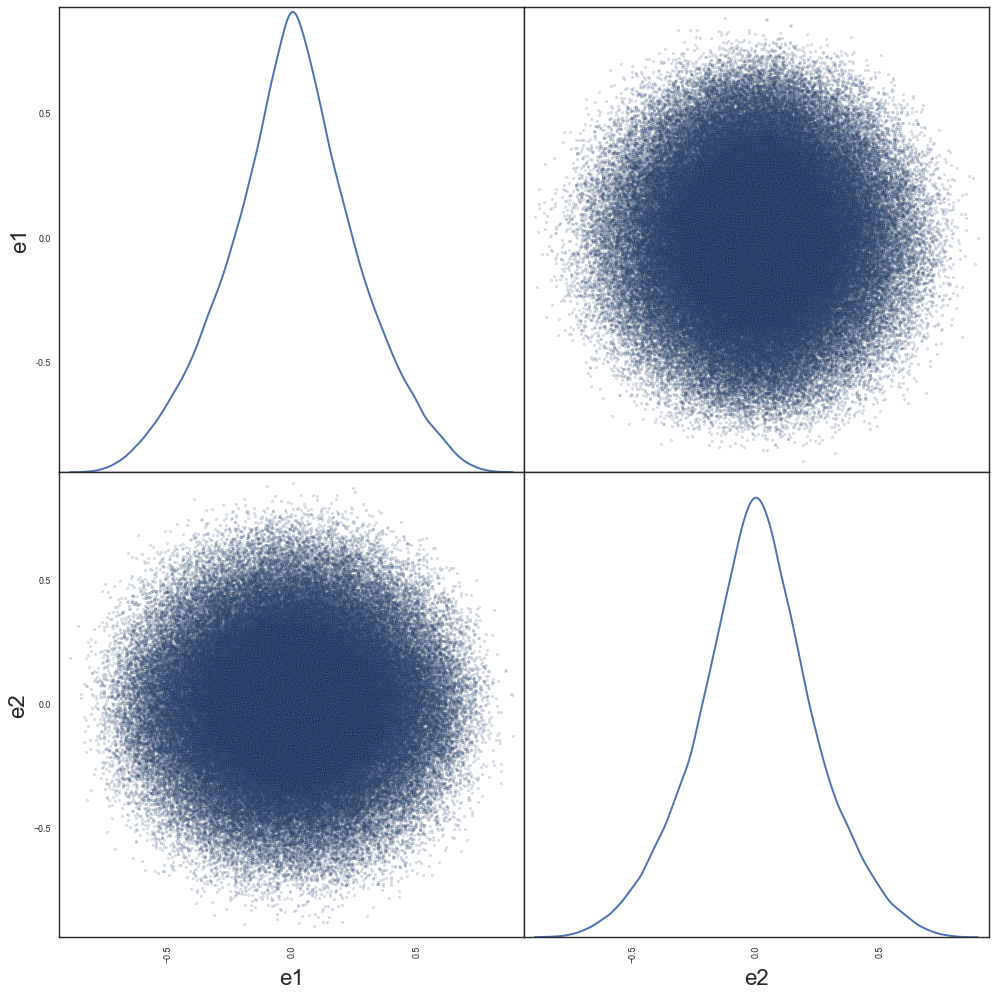

In [28]:
_ = scatter_matrix(df[['e1','e2']], 
               diagonal='kde', alpha=0.2, figsize=(15, 15))

No bimodal distribution for ellipticties

# full sample of galaxies

In [92]:
plot_spatial_distribution.func_doc

Non-zero min dist =  0.000436623739626
Non-zero min normalized dist =  0.000157025745573


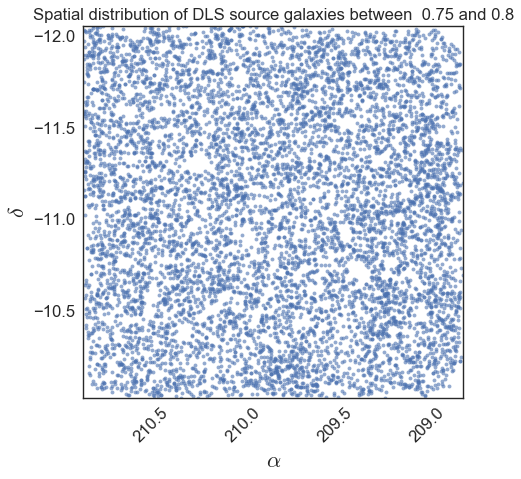

In [95]:
select.plot_spatial_distribution(
    df[photoz_mask], 
    title='Spatial distribution of DLS source galaxies between '
    + ' {0} and {1}'.format(*photoz_cuts), alpha=.6
    )

# to subset the df we have to randomly sample indices

In [141]:
2048 * 4

8192

In [143]:
idx = np.random.choice(range(df[photoz_mask].shape[0]), 
                           size=8192)

In [146]:
datasets = [idx[2048 * i:2048 *(i + 1)] for i in range(4)]

In [152]:
datasets

[array([2019, 1506, 8304, ..., 7304, 2233, 1218]),
 array([5694, 4428, 5477, ..., 5038, 2582, 6406]),
 array([4575, 6870, 8280, ..., 5366, 4677,  433]),
 array([3603,   23, 7901, ..., 6979, 6522, 2066])]

Non-zero min dist =  0.000797076941071
Non-zero min normalized dist =  0.000291428920357


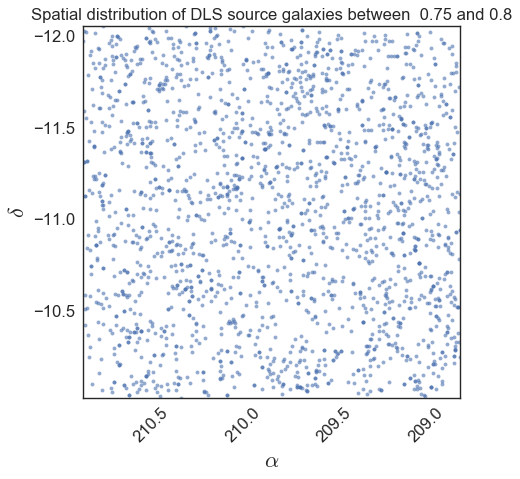

Non-zero min dist =  0.000986417117654
Non-zero min normalized dist =  0.000361227827839


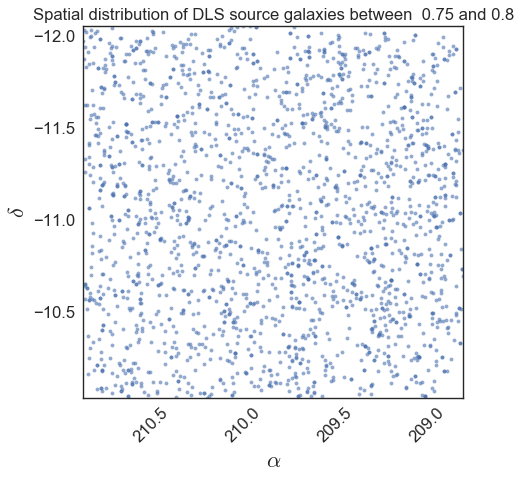

Non-zero min dist =  0.000559850274633
Non-zero min normalized dist =  0.000204374219651


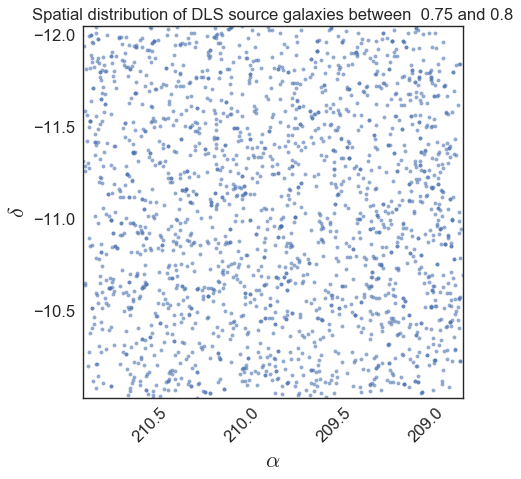

Non-zero min dist =  0.000446814469325
Non-zero min normalized dist =  0.000164760088346


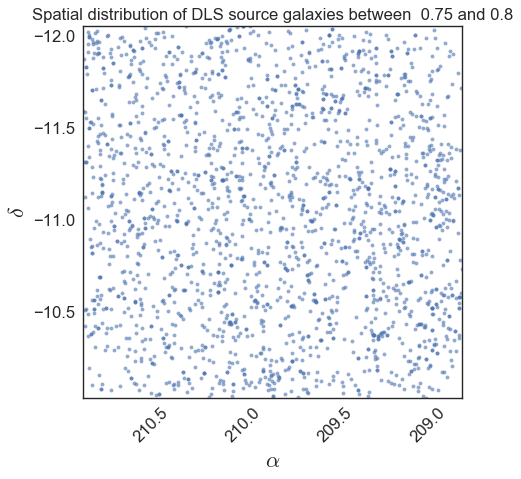

In [156]:
for ds in datasets:
    select.plot_spatial_distribution(
        df[photoz_mask].iloc[ds], 
        title='Spatial distribution of DLS source galaxies between '
        + ' {0} and {1}'.format(*photoz_cuts), alpha=.6
    )
    plt.show()
    plt.close()

# visualize the variation of ellipticity at each galaxy location

In [121]:
norm_dist_mtx, dist_mtx = select.print_spatial_dist_stat(F5_2000_slice)

Non-zero min dist =  0.000525650692
Non-zero min normalized dist =  0.000195165534178


# save the full outputs

In [181]:
for i, ds in enumerate(datasets):
    out_filepath = "../../MagicBeans/dls/"
    outfile_name = "F5_photoz_pt75_to_pt8_2048_set{}.h5".format(i)
    thisdf = df[photoz_mask].iloc[ds].reset_index()
    thisdf.to_hdf(outfile_name, "df")
    fake_reaper_file = "reaper_F5_" + outfile_name[3:]
    reaper = prep.CatalogToReaper(outfile_name, "e1", "e2", "de", "alpha", 
                              "delta", "z_b", r_col=15)
    reaper.Save(out_filepath + fake_reaper_file)
    print ("Outputting file to ", out_filepath + fake_reaper_file)

input file:  F5_photoz_pt75_to_pt8_2048_set0 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.71657 7.98303
input de range: 0.00638594 0.249828
input catalog size: 2048
WARNING masking occurred: down-selected catalog size: 2048
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file to  ../../MagicBeans/dls/reaper_F5_photoz_pt75_to_pt8_2048_set0.h5
input file:  F5_photoz_pt75_to_pt8_2048_set1 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.75992 13.6001
input de range: 0.00716263 0.249491
input catalog size: 2048
WARNING masking occurred: down-selected catalog size: 2048
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file t